In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt


In [53]:
(x_train , y_train) , (x_test , y_test) = datasets.cifar10.load_data()

In [54]:
y_train.shape

(50000, 1)

In [55]:
x_test.shape

(10000, 32, 32, 3)

In [56]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [57]:
# change this to 1D array since we don not need 2D array
y_train = y_train.reshape(50000,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [58]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
classes[9]

'truck'

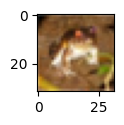

In [59]:
plt.figure(figsize= [14 , 1])
plt.imshow(x_train[0])

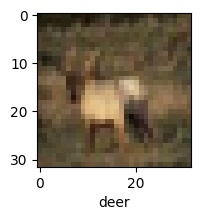

In [62]:
import matplotlib.pyplot as plt

def plot_image(x , y , index):
    plt.figure(figsize = [15 , 2])
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    
plot_image(x_train , y_train , 3)

In [65]:
x_test[0]
# divide the pixel value  by 255

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [66]:
x_train = x_train/255
x_test = x_test/255

In [68]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.3036 - loss: 1.9266
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4202 - loss: 1.6473
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4544 - loss: 1.5516
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4754 - loss: 1.4900
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4954 - loss: 1.4364


In [69]:
ann.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4915 - loss: 1.4542


[1.456172227859497, 0.48579999804496765]

In [70]:
# so ANN performance is very low  for Image Classifications so use CNN

cnn = keras.Sequential([

    #CNN layers
    keras.layers.Conv2D(filters = 32 , kernel_size = ((3 , 3)) , activation = 'relu' , input_shape = (32 , 32 , 3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters = 64 , kernel_size = ((3 , 3)) , activation = 'relu' , input_shape = (32 , 32 , 3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
    
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
cnn.fit(x_train , y_train ,epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7270 - loss: 0.7882
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7437 - loss: 0.7474
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7612 - loss: 0.6918
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7668 - loss: 0.6676
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7801 - loss: 0.6387
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7925 - loss: 0.6002
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7952 - loss: 0.5787
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8114 - loss: 0.5441
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8161 - loss: 0.5255
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8245 - loss: 0.4960


In [73]:
cnn.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7116 - loss: 0.9675


[0.9902854561805725, 0.701200008392334]

In [75]:
y_pred = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [76]:
y_pred[0]

array([1.0323004e-03, 6.8388181e-04, 3.3132808e-04, 6.4613950e-01,
       9.2295977e-07, 3.4552285e-01, 2.0264112e-03, 4.3777221e-05,
       4.6931766e-04, 3.7497343e-03], dtype=float32)

In [77]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [80]:
y_test = y_test.reshape(10000,)

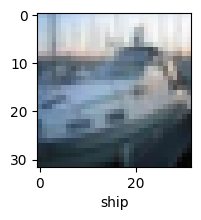

In [91]:
plot_image(x_test ,y_test , 2)

In [84]:
import numpy as np
y_pred_classes = [np.argmax(element) for element in y_pred]

In [85]:
y_pred_classes[:5]

[np.int64(3), np.int64(8), np.int64(1), np.int64(0), np.int64(6)]

In [92]:
classes[y_pred_classes[2]]  # predicted classes

'automobile'

In [86]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [93]:
from sklearn.metrics import classification_report

In [96]:
print("Classification Report:\n" , classification_report(y_test , y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.82      0.72      1000
           1       0.78      0.85      0.81      1000
           2       0.64      0.58      0.61      1000
           3       0.56      0.49      0.52      1000
           4       0.69      0.62      0.65      1000
           5       0.57      0.69      0.62      1000
           6       0.77      0.77      0.77      1000
           7       0.79      0.69      0.74      1000
           8       0.89      0.70      0.78      1000
           9       0.74      0.80      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

